Vertical advective transport of water and tracers
===================================

In this notebook I calculate advective transport of W, T, S, and tracers for runs 12,13,14.

These runs have uniform vertical diffusivity, REDI scheme (GM_background_K=0.0) and linear initial profiles of T, S, and tracers.

Isopycnal diffusivities (GM_isopycK) in REDI are:

Run12 : 10.0 $m^2s^{-1}$,

Run13 : 1.0 $m^2s^{-1}$,

Run14 : 1.E-01$m^2s^{-1}$,

For all runs: 

KvT = KvS = E-5 $m^2s^{-1}$

KvTr1 = E-5 $m^2s^{-1}$

KvTr2 = E-3 $m^2s^{-1}$

KvTr3 = E-1 $m^2s^{-1}$

Background horizontal diffusivity (GM_Kmin_horiz) E-5 $m^2s^{-1}$ (for stability)

Advective flux density is calculated as:

$J=Cw$ , where C is the concentration and w is the vertical component of velociity

In [1]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

from math import *

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl


In [2]:
# Get field from MITgcm netCDF output

def getField(statefile, fieldname):
    ''' :statefile : string with /path/to/state.0000000000.t001.nc
    :fieldname : string with the variable name as written on the netCDF file ('Temp', 'S','Eta', etc.)'''
    
    StateOut = Dataset(statefile)
    
    Fld = StateOut.variables[fieldname][:]
    
    shFld = np.shape(Fld)
    
        
    if len(shFld) == 2:
        
        Fld2 = np.reshape(Fld,(shFld[0],shFld[1])) # reshape to pcolor order
        return Fld2 
    
    elif len(shFld) == 3:
        
        Fld2 = np.zeros((shFld[0],shFld[1],shFld[2])) 
        Fld2 = np.reshape(Fld,(shFld[0],shFld[1],shFld[2])) # reshape to pcolor order
        return Fld2
        
    elif len(shFld) == 4:
        
        Fld2 = np.zeros((shFld[0],shFld[1],shFld[2],shFld[3])) 
        Fld2 = np.reshape(Fld,(shFld[0],shFld[1],shFld[2],shFld[3])) # reshape to pcolor order
        return Fld2
        
    else:
        
        print (' Check size of field ')
    
    


In [3]:
filename1A='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run12/state.0000000000.glob.nc'

filename2A='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run12/grid.glob.nc'

filename3A='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run12/ptracers.0000000000.glob.nc'

filename1B='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/state.0000000000.glob.nc'

filename2B='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/grid.glob.nc'

filename3B='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/ptracers.0000000000.glob.nc'

filename1C='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run14/state.0000000000.glob.nc'

filename2C='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run14/grid.glob.nc'

filename3C='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run14/ptracers.0000000000.glob.nc'



/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/home/kramosmu/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


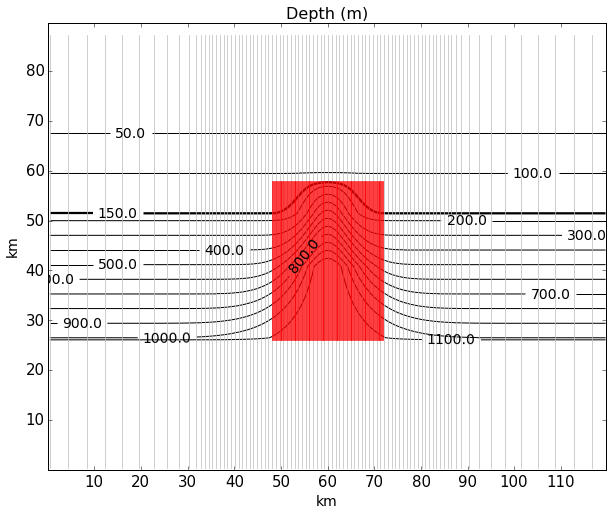

In [4]:
bathy = getField(filename2A, 'Depth')
xc    = getField(filename2A, 'XC') # x coords tracer cells
yc    = getField(filename2A, 'YC') # y coords tracer cells

plt.rcParams.update({'font.size': 15})

fig = plt.figure(figsize=(10,8))

plt.plot(xc[::4,::4],yc[::4,::4],linewidth=0.75, linestyle='-', color='0.75')

plt.plot(xc[70:-130,120:-120],yc[70:-130,120:-120],linewidth=0.75, linestyle='-', color='r')


lev = range(200,1200,100)

levels = [50,100,150]+lev

CS = plt.contour(xc,yc,bathy,levels,colors='k',linewidths=[1,1,2.25,1,1,1,1,1,1,1,1,1,1] )

plt.clabel(CS, 
           inline=1,
          fmt='%1.1f',
           fontsize=14)



plt.xticks(np.arange(0,120000,10000), [' ','10','20','30','40','50','60','70','80','90','100','110','120'])
plt.yticks(np.arange(0,90000,10000), [' ','10','20','30','40','50','60','70','80','90'])

plt.xlabel('km',fontsize=14)
plt.ylabel('km',fontsize=14)

plt.title('Depth (m)',fontsize=16)


#plt.savefig('AcrossShoreLines.png', bbox_inches='tight')
#plt.savefig('AcrossShoreLines.pdf', bbox_inches='tight')

In [5]:
# Get vertical velocity
WA =  getField(filename1A, 'W')
WB = getField(filename1B, 'W')
WC = getField(filename1C, 'W')

rA = getField(filename2A, 'rA') # same for all runs

In [6]:
SB = 30 # shelf break index
nt = 19 # number of output snapshots

Tempreature and Salinity advective vertical transport

In [7]:
# Run12 Temp
trac = getField(filename1A,'Temp')

TempTransA = np.zeros(nt)

for time in range(0,nt,1):
    TempTransA[time] = np.sum(np.sum(rA[70:-130,120:-120]*WA[time,SB,70:-130,120:-120]*trac[time,SB,70:-130,120:-120]))
    
# Run13 Temp
trac = getField(filename1B,'Temp')

TempTransB = np.zeros(nt)

for time in range(0,nt,1):
    TempTransB[time] = np.sum(np.sum(rA[70:-130,120:-120]*WB[time,SB,70:-130,120:-120]*trac[time,SB,70:-130,120:-120]))
   
# Run14 Temp
trac = getField(filename1C,'Temp')

TempTransC = np.zeros(nt)

for time in range(0,nt,1):
    TempTransC[time] = np.sum(np.sum(rA[70:-130,120:-120]*WC[time,SB,70:-130,120:-120]*trac[time,SB,70:-130,120:-120]))
   


In [8]:
# Run12 Salinity
trac = getField(filename1A,'S')

SalTransA = np.zeros(nt)

for time in range(0,nt,1):
    SalTransA[time] = np.sum(np.sum(rA[70:-130,120:-120]*WA[time,SB,70:-130,120:-120]*trac[time,SB,70:-130,120:-120]))
    
# Run13 Salinity
trac = getField(filename1B,'S')

SalTransB = np.zeros(nt)

for time in range(0,nt,1):
    SalTransB[time] = np.sum(np.sum(rA[70:-130,120:-120]*WB[time,SB,70:-130,120:-120]*trac[time,SB,70:-130,120:-120]))
   
# Run14 Salinity
trac = getField(filename1C,'S')

SalTransC = np.zeros(nt)

for time in range(0,nt,1):
    SalTransC[time] = np.sum(np.sum(rA[70:-130,120:-120]*WC[time,SB,70:-130,120:-120]*trac[time,SB,70:-130,120:-120]))
   


In [9]:
# Run12 Water

WatTransA = np.zeros(nt)

for time in range(0,nt,1):
    WatTransA[time] = np.sum(np.sum(rA[70:-130,120:-120]*WA[time,SB,70:-130,120:-120]))
    
# Run13 Water

WatTransB = np.zeros(nt)

for time in range(0,nt,1):
    WatTransB[time] = np.sum(np.sum(rA[70:-130,120:-120]*WB[time,SB,70:-130,120:-120]))
   
# Run14 Water

WatTransC = np.zeros(nt)

for time in range(0,nt,1):
    WatTransC[time] = np.sum(np.sum(rA[70:-130,120:-120]*WC[time,SB,70:-130,120:-120]))
   

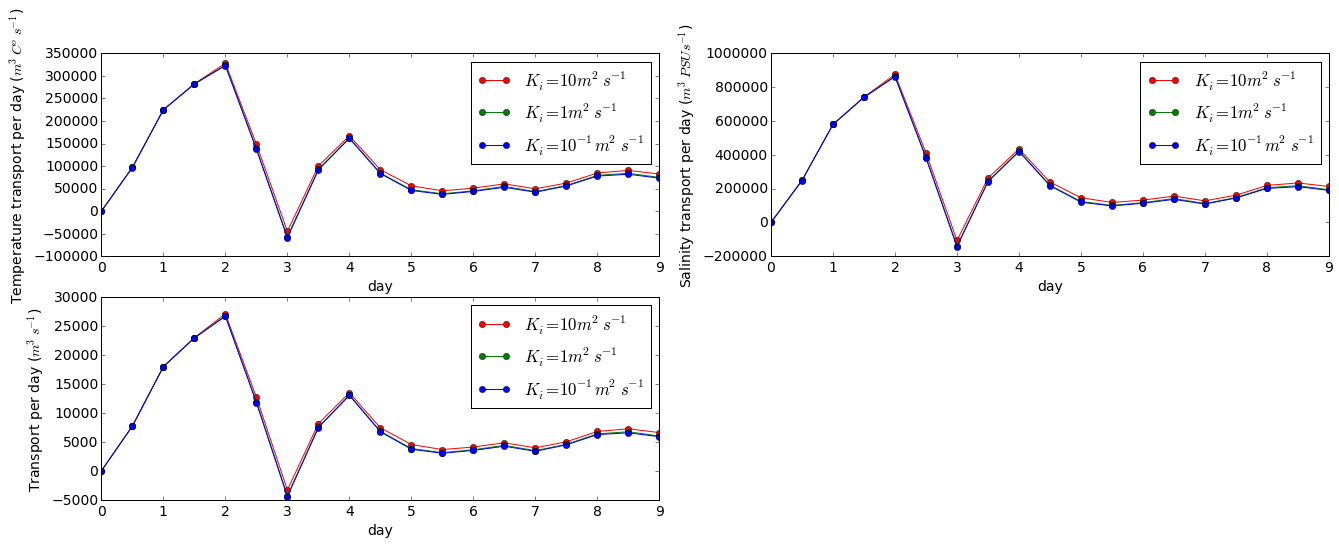

In [10]:
plt.rcParams.update({'font.size':14})
fig45=plt.figure(figsize=(22,8))

plt.subplot(2,2,1)
TempA=plt.plot(np.arange(0,9.5,0.5),TempTransA,'ro-',label='$K_{i}=10m^2s^{-1}$')
TempB=plt.plot(np.arange(0,9.5,0.5),TempTransB,'go-',label='$K_{i}=1m^2s^{-1}$')
TempC=plt.plot(np.arange(0,9.5,0.5),TempTransC,'bo-',label='$K_{i}=10^{-1}m^2s^{-1}$')

plt.ylabel('Temperature transport per day ($m^3C{^o}s^{-1}$)')
plt.xlabel('day')
plt.legend()

plt.subplot(2,2,2)
SalA=plt.plot(np.arange(0,9.5,0.5),SalTransA,'ro-',label='$K_{i}=10m^2s^{-1}$')
SalB=plt.plot(np.arange(0,9.5,0.5),SalTransB,'go-',label='$K_{i}=1m^2s^{-1}$')
SalC=plt.plot(np.arange(0,9.5,0.5),SalTransC,'bo-',label='$K_{i}=10^{-1}m^2s^{-1}$')

plt.ylabel('Salinity transport per day ($m^3PSUs^{-1}$)')
plt.xlabel('day')
plt.legend()

plt.subplot(2,2,3)
WatA=plt.plot(np.arange(0,9.5,0.5),WatTransA,'ro-',label='$K_{i}=10m^2s^{-1}$')
WatB=plt.plot(np.arange(0,9.5,0.5),WatTransB,'go-',label='$K_{i}=1m^2s^{-1}$')
WatC=plt.plot(np.arange(0,9.5,0.5),WatTransC,'bo-',label='$K_{i}=10^{-1}m^2s^{-1}$')

plt.ylabel('Transport per day ($m^3s^{-1}$)')
plt.xlabel('day')
plt.legend()

Tracers advective vertical transport

In [11]:
# Run12 Tr1
trac = getField(filename3A,'Tr1')

Tr1TransA = np.zeros(nt)

for time in range(0,nt,1):
    Tr1TransA[time] = np.sum(np.sum(rA[70:-130,120:-120]*WA[time,SB,70:-130,120:-120]*trac[time,SB,70:-130,120:-120]))
    
# Run13 Tr1
trac = getField(filename3B,'Tr1')

Tr1TransB = np.zeros(nt)

for time in range(0,nt,1):
    Tr1TransB[time] = np.sum(np.sum(rA[70:-130,120:-120]*WB[time,SB,70:-130,120:-120]*trac[time,SB,70:-130,120:-120]))
   
# Run14 Tr1
trac = getField(filename3C,'Tr1')

Tr1TransC = np.zeros(nt)

for time in range(0,nt,1):
    Tr1TransC[time] = np.sum(np.sum(rA[70:-130,120:-120]*WC[time,SB,70:-130,120:-120]*trac[time,SB,70:-130,120:-120]))
   

In [12]:
# Run12 Tr2
trac = getField(filename3A,'Tr2')

Tr2TransA = np.zeros(nt)

for time in range(0,nt,1):
    Tr2TransA[time] = np.sum(np.sum(rA[70:-130,120:-120]*WA[time,SB,70:-130,120:-120]*trac[time,SB,70:-130,120:-120]))
    
# Run13 Tr2
trac = getField(filename3B,'Tr2')

Tr2TransB = np.zeros(nt)

for time in range(0,nt,1):
    Tr2TransB[time] = np.sum(np.sum(rA[70:-130,120:-120]*WB[time,SB,70:-130,120:-120]*trac[time,SB,70:-130,120:-120]))
   
# Run14 Tr2
trac = getField(filename3C,'Tr2')

Tr2TransC = np.zeros(nt)

for time in range(0,nt,1):
    Tr2TransC[time] = np.sum(np.sum(rA[70:-130,120:-120]*WC[time,SB,70:-130,120:-120]*trac[time,SB,70:-130,120:-120]))
   

In [13]:
# Run12 Tr3
trac = getField(filename3A,'Tr3')

Tr3TransA = np.zeros(nt)

for time in range(0,nt,1):
    Tr3TransA[time] = np.sum(np.sum(rA[70:-130,120:-120]*WA[time,SB,70:-130,120:-120]*trac[time,SB,70:-130,120:-120]))
    
# Run13 Tr3
trac = getField(filename3B,'Tr3')

Tr3TransB = np.zeros(nt)

for time in range(0,nt,1):
    Tr3TransB[time] = np.sum(np.sum(rA[70:-130,120:-120]*WB[time,SB,70:-130,120:-120]*trac[time,SB,70:-130,120:-120]))
   
# Run14 Tr3
trac = getField(filename3C,'Tr3')

Tr3TransC = np.zeros(nt)

for time in range(0,nt,1):
    Tr3TransC[time] = np.sum(np.sum(rA[70:-130,120:-120]*WC[time,SB,70:-130,120:-120]*trac[time,SB,70:-130,120:-120]))
   

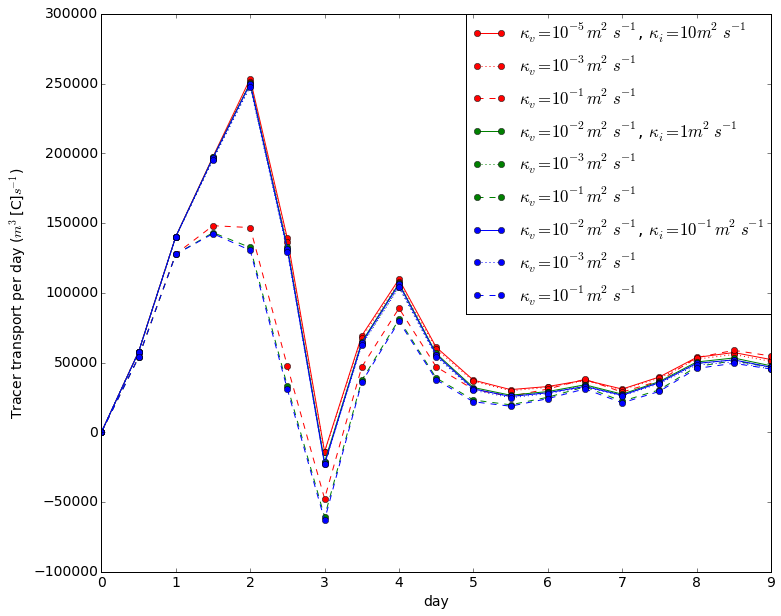

In [50]:
fig45=plt.figure(figsize=(12,10))

Tr1run12=plt.plot(np.arange(0,9.5,0.5),Tr1TransA,'ro-',label='$\kappa_{v}=10^{-2}m^2s^{-1}$, $\kappa_{i}=10m^2s^{-1}$')
Tr2run12=plt.plot(np.arange(0,9.5,0.5),Tr2TransA,'ro:',label='$\kappa_{v}=10^{-3}m^2s^{-1}$')
Tr3run12=plt.plot(np.arange(0,9.5,0.5),Tr3TransA,'ro--',label='$\kappa_{v}=10^{-1}m^2s^{-1}$')
Tr1run13=plt.plot(np.arange(0,9.5,0.5),Tr1TransB,'go-',label='$\kappa_{v}=10^{-2}m^2s^{-1}$, $\kappa_{i}=1m^2s^{-1}$')
Tr2run13=plt.plot(np.arange(0,9.5,0.5),Tr2TransB,'go:',label='$\kappa_{v}=10^{-3}m^2s^{-1}$')
Tr3run13=plt.plot(np.arange(0,9.5,0.5),Tr3TransB,'go--',label='$\kappa_{v}=10^{-1}m^2s^{-1}$')
Tr1run14=plt.plot(np.arange(0,9.5,0.5),Tr1TransC,'bo-',label='$\kappa_{v}=10^{-2}m^2s^{-1}$, $\kappa_{i}=10^{-1}m^2s^{-1}$')
Tr2run14=plt.plot(np.arange(0,9.5,0.5),Tr2TransC,'bo:',label='$\kappa_{v}=10^{-3}m^2s^{-1}$')
Tr3run14=plt.plot(np.arange(0,9.5,0.5),Tr3TransC,'bo--',label='$\kappa_{v}=10^{-1}m^2s^{-1}$')
plt.ylabel('Tracer transport per day ($m^3$[C]$s^{-1}$)')
plt.xlabel('day')
plt.legend(loc=(0.544,0.462))


Comparison between REDI and no REDI runs (360x360x90_BodyForcing_3Tr_LinProfiles_BarkleyHyd)
-----------------------------------------------------------------------------------

These runs have uniform vertical diffusivity, linear initial profiles of T, S, and tracers.

KvT = KvS = E-7 $m^2s^{-1}$

KvTr1 = E-3 $m^2s^{-1}$

KvTr2 = E-2 $m^2s^{-1}$

KvTr3 = E-1 $m^2s^{-1}$

horizontal diffusivity (KhTr) E-5 $m^2s^{-1}$ for all tracers

In [15]:
filename1D='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_Linprofiles_BarkleyHyd/run01/state.0000000000.glob.nc'

filename2D='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_Linprofiles_BarkleyHyd/run01/grid.glob.nc'

filename3D='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_Linprofiles_BarkleyHyd/run01/ptracers.0000000000.glob.nc'



In [16]:
# Get vertical velocity
WD =  getField(filename1D, 'W')



Temperature and salinity transport

In [17]:
# Run01 Temp
trac = getField(filename1D,'Temp')

TempTransD = np.zeros(nt)

for time in range(0,nt,1):
    TempTransD[time] = np.sum(np.sum(rA[70:-130,120:-120]*WD[time,SB,70:-130,120:-120]*trac[time,SB,70:-130,120:-120]))
    

# Run01 Salinity
trac = getField(filename1D,'S')

SalTransD = np.zeros(nt)

for time in range(0,nt,1):
    SalTransD[time] = np.sum(np.sum(rA[70:-130,120:-120]*WD[time,SB,70:-130,120:-120]*trac[time,SB,70:-130,120:-120]))
    

# Run01 Water

WatTransD = np.zeros(nt)

for time in range(0,nt,1):
    WatTransD[time] = np.sum(np.sum(rA[70:-130,120:-120]*WD[time,SB,70:-130,120:-120]))

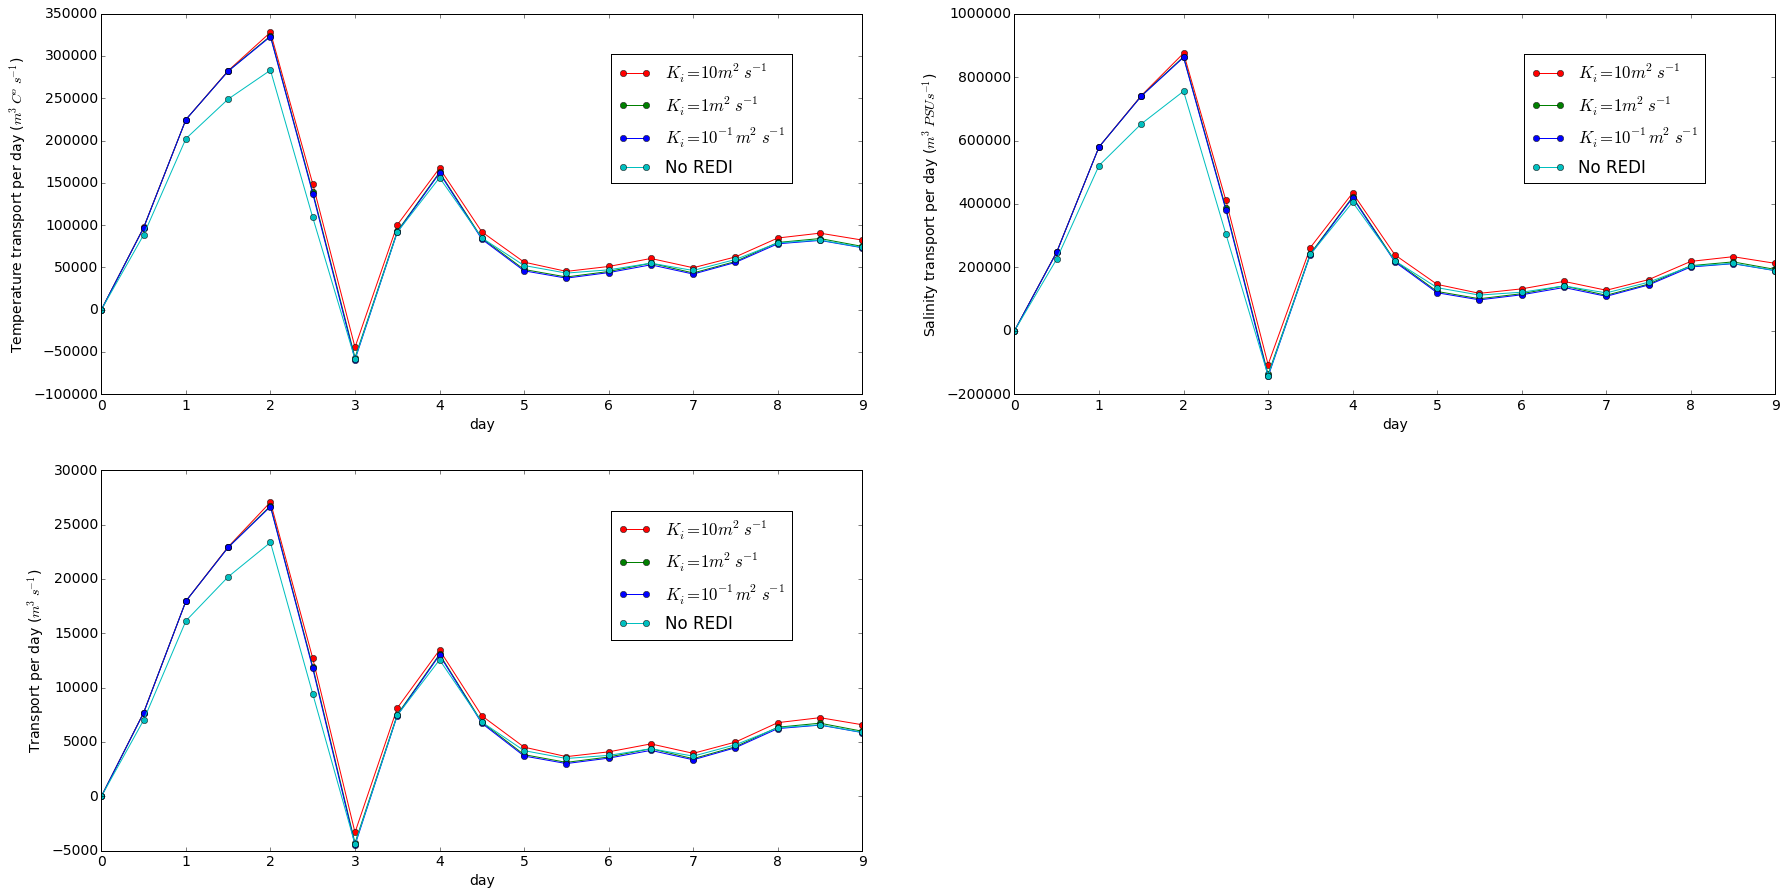

In [26]:
plt.rcParams.update({'font.size':14})
fig45=plt.figure(figsize=(30,15))

plt.subplot(2,2,1)
TempA=plt.plot(np.arange(0,9.5,0.5),TempTransA,'ro-',label='$K_{i}=10m^2s^{-1}$')
TempB=plt.plot(np.arange(0,9.5,0.5),TempTransB,'go-',label='$K_{i}=1m^2s^{-1}$')
TempC=plt.plot(np.arange(0,9.5,0.5),TempTransC,'bo-',label='$K_{i}=10^{-1}m^2s^{-1}$')
TempD=plt.plot(np.arange(0,9.5,0.5),TempTransD,'co-',label='No REDI')

plt.ylabel('Temperature transport per day ($m^3C{^o}s^{-1}$)')
plt.xlabel('day')
plt.legend(loc=(0.67,0.555))

plt.subplot(2,2,2)
SalA=plt.plot(np.arange(0,9.5,0.5),SalTransA,'ro-',label='$K_{i}=10m^2s^{-1}$')
SalB=plt.plot(np.arange(0,9.5,0.5),SalTransB,'go-',label='$K_{i}=1m^2s^{-1}$')
SalC=plt.plot(np.arange(0,9.5,0.5),SalTransC,'bo-',label='$K_{i}=10^{-1}m^2s^{-1}$')
SalD=plt.plot(np.arange(0,9.5,0.5),SalTransD,'co-',label='No REDI')

plt.ylabel('Salinity transport per day ($m^3PSUs^{-1}$)')
plt.xlabel('day')
plt.legend(loc=(0.67,0.555))

plt.subplot(2,2,3)
WatA=plt.plot(np.arange(0,9.5,0.5),WatTransA,'ro-',label='$K_{i}=10m^2s^{-1}$')
WatB=plt.plot(np.arange(0,9.5,0.5),WatTransB,'go-',label='$K_{i}=1m^2s^{-1}$')
WatC=plt.plot(np.arange(0,9.5,0.5),WatTransC,'bo-',label='$K_{i}=10^{-1}m^2s^{-1}$')
WatD=plt.plot(np.arange(0,9.5,0.5),WatTransD,'co-',label='No REDI')

plt.ylabel('Transport per day ($m^3s^{-1}$)')
plt.xlabel('day')
plt.legend(loc=(0.67,0.555))

Tracer transport

In [19]:
# Run01 Tr1
trac = getField(filename3D,'Tr1')

Tr1TransD = np.zeros(nt)

for time in range(0,nt,1):
    Tr1TransD[time] = np.sum(np.sum(rA[70:-130,120:-120]*WD[time,SB,70:-130,120:-120]*trac[time,SB,70:-130,120:-120]))
    
# Run01 Tr2
trac = getField(filename3D,'Tr2')

Tr2TransD = np.zeros(nt)

for time in range(0,nt,1):
    Tr2TransD[time] = np.sum(np.sum(rA[70:-130,120:-120]*WD[time,SB,70:-130,120:-120]*trac[time,SB,70:-130,120:-120]))
   
# Run01 Tr3
trac = getField(filename3D,'Tr3')

Tr3TransD = np.zeros(nt)

for time in range(0,nt,1):
    Tr3TransD[time] = np.sum(np.sum(rA[70:-130,120:-120]*WD[time,SB,70:-130,120:-120]*trac[time,SB,70:-130,120:-120]))
   

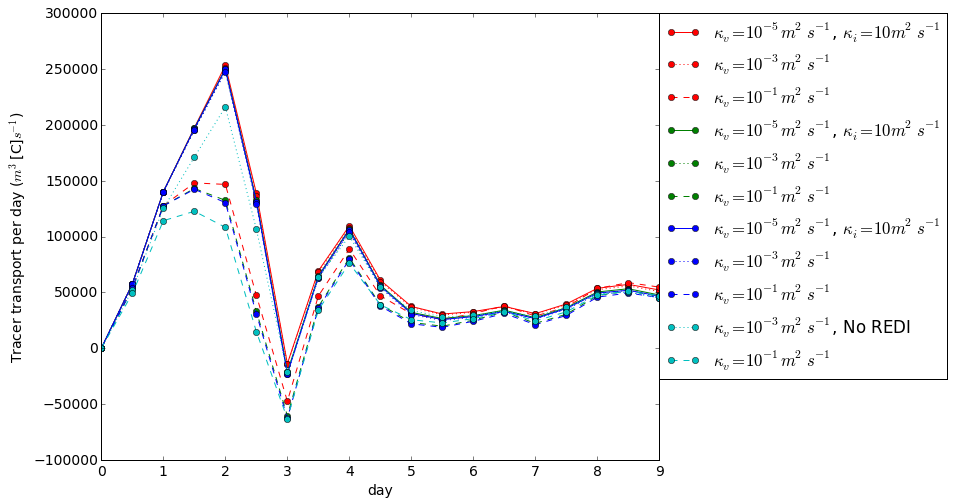

In [34]:
fig46=plt.figure(figsize=(10,8))

Tr1run12=plt.plot(np.arange(0,9.5,0.5),Tr1TransA,'ro-',label='$\kappa_{v}=10^{-5}m^2s^{-1}$, $\kappa_{i}=10m^2s^{-1}$')
Tr2run12=plt.plot(np.arange(0,9.5,0.5),Tr2TransA,'ro:',label='$\kappa_{v}=10^{-3}m^2s^{-1}$')
Tr3run12=plt.plot(np.arange(0,9.5,0.5),Tr3TransA,'ro--',label='$\kappa_{v}=10^{-1}m^2s^{-1}$')
Tr1run13=plt.plot(np.arange(0,9.5,0.5),Tr1TransB,'go-',label='$\kappa_{v}=10^{-5}m^2s^{-1}$, $\kappa_{i}=10m^2s^{-1}$')
Tr2run13=plt.plot(np.arange(0,9.5,0.5),Tr2TransB,'go:',label='$\kappa_{v}=10^{-3}m^2s^{-1}$')
Tr3run13=plt.plot(np.arange(0,9.5,0.5),Tr3TransB,'go--',label='$\kappa_{v}=10^{-1}m^2s^{-1}$')
Tr1run14=plt.plot(np.arange(0,9.5,0.5),Tr1TransC,'bo-',label='$\kappa_{v}=10^{-5}m^2s^{-1}$, $\kappa_{i}=10m^2s^{-1}$')
Tr2run14=plt.plot(np.arange(0,9.5,0.5),Tr2TransC,'bo:',label='$\kappa_{v}=10^{-3}m^2s^{-1}$')
Tr3run14=plt.plot(np.arange(0,9.5,0.5),Tr3TransC,'bo--',label='$\kappa_{v}=10^{-1}m^2s^{-1}$')
Tr1run01=plt.plot(np.arange(0,9.5,0.5),Tr1TransD,'co:',label='$\kappa_{v}=10^{-3}m^2s^{-1}$, No REDI')
#Tr2run01=plt.plot(np.arange(0,9.5,0.5),Tr2TransD,'c*-',label='Tr2-D')
Tr3run01=plt.plot(np.arange(0,9.5,0.5),Tr3TransD,'co--',label='$\kappa_{v}=10^{-1}m^2s^{-1}$')

plt.ylabel('Tracer transport per day ($m^3$[C]$s^{-1}$)')
plt.xlabel('day')
plt.legend(loc=(1,0.182))


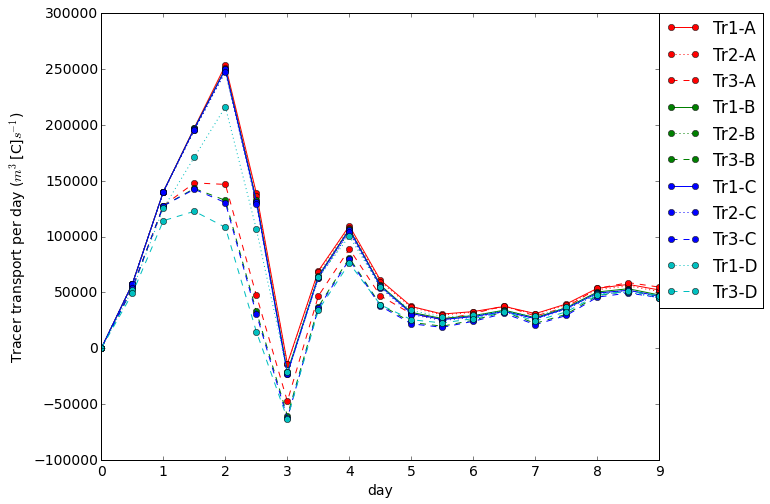

In [21]:
fig46=plt.figure(figsize=(10,8))

Tr1run12=plt.plot(np.arange(0,9.5,0.5),Tr1TransA,'ro-',label='Tr1-A')
Tr2run12=plt.plot(np.arange(0,9.5,0.5),Tr2TransA,'ro:',label='Tr2-A')
Tr3run12=plt.plot(np.arange(0,9.5,0.5),Tr3TransA,'ro--',label='Tr3-A')
Tr1run13=plt.plot(np.arange(0,9.5,0.5),Tr1TransB,'go-',label='Tr1-B')
Tr2run13=plt.plot(np.arange(0,9.5,0.5),Tr2TransB,'go:',label='Tr2-B')
Tr3run13=plt.plot(np.arange(0,9.5,0.5),Tr3TransB,'go--',label='Tr3-B')
Tr1run14=plt.plot(np.arange(0,9.5,0.5),Tr1TransC,'bo-',label='Tr1-C')
Tr2run14=plt.plot(np.arange(0,9.5,0.5),Tr2TransC,'bo:',label='Tr2-C')
Tr3run14=plt.plot(np.arange(0,9.5,0.5),Tr3TransC,'bo--',label='Tr3-C')
Tr1run01=plt.plot(np.arange(0,9.5,0.5),Tr1TransD,'co:',label='Tr1-D')
#Tr2run01=plt.plot(np.arange(0,9.5,0.5),Tr2TransD,'c*-',label='Tr2-D')
Tr3run01=plt.plot(np.arange(0,9.5,0.5),Tr3TransD,'co--',label='Tr3-D')

plt.ylabel('Tracer transport per day ($m^3$[C]$s^{-1}$)')
plt.xlabel('day')
plt.legend(loc=(1,0.34))

From the plots, a time dependent phase and an advective phase can be seen in the transport series. It also seems like isopycnal diffusivity is not as important as vertical diffusivity for the amount of transport throughout time. From these sloppy calculations of vertical transport, it looks like the more vertical diffusivity you put, the less transport you get. All transports (for all runs) converge in the advective phase. A little bit more transport for larger isopycnal diff values.

Without REDI, tracer transports are comparatively smaller than with REDI for tracers with the same Kv and background Kh. This is also true for water, T and S, although Kh for these was E-7 for the non-REDI runs and E-5 for runs with REDI.